# HW Guide Part B: Reconstructing the S&P 500 Index


## Introduction

The **S&P 500 Index** is one of the most well-known benchmarks for the U.S. equity market. It represents the performance of 500 large-cap companies across various industries, serving as a proxy for the overall stock market. Constructing an index of this nature involves aggregation of market data, weighting by market capitalization, and accounting for changes in index membership over time. This lecture introduces the mechanics of the S&P 500 index, provides an overview of its construction, and guides you through a case study on approximating its level and returns using data from CRSP and WRDS. Some of the information needed to perfectly replicate the S\&P 500 index is proprietary and not available through WRDS. So, the approximation in the next section will be imperfect. However, it will be close enough. For now, we will use this note to get a better understanding of how the S\&P 500 is constructed. 


### Why Reconstruct the S&P 500 Index?

Reconstructing the S&P 500 index from its underlying constituents is a valuable exercise for students of quantitative finance. This process:

1. **Provides Practical Data Experience**: You'll gain hands-on experience with downloading and processing real financial data from Wharton Research Data Services (WRDS) and CRSP.
2. **Develops Insight into Index Construction**: By breaking down the methodology, you will better understand the structure and mechanics of market-capitalization-weighted indices.
3. **Builds Programming Skills**: The reconstruction process requires advanced data handling, including merging datasets, calculating weights, and implementing rebalancing rules.
4. **Reveals Approximation Techniques**: As the S&P 500’s official calculation includes proprietary adjustments, this exercise demonstrates how to approximate real-world phenomena using accessible data and mathematical techniques.
5. **Enhances Quantitative Finance Skills**: The reconstruction builds your ability to analyze returns, index performance, and the impact of portfolio rebalancing.

### Learning Goals

By the end of this lecture and exercise, you should be able to:
- Explain the construction methodology of the S&P 500 index.
- Use historical data on index constituents, prices, and shares outstanding to approximate the index.
- Implement two methods for approximating the index:
  - **Method A**: a simple sum of the market caps of the index's constituents
  - **Method B**: an approximation that assumes that a trader forms a porfolio holding the index's constituents and rebalances the portfolio quarterly.
- Compare your reconstructed index to the actual S&P 500 index by analyzing the correlation of levels and returns.

---


## Official S\&P 500 Index Methodology


The S&P 500 index contains approximately 500 of the largest publicly traded U.S. companies by market capitalization, selected by the S&P Dow Jones Indices committee based on criteria such as liquidity, profitability, and market size. The index is a **market-capitalization-weighted index**, meaning that each stock in the index is weighted by its market cap. The index is rebalanced quarterly to reflect changes in membership and market values, ensuring it accurately represents the large-cap equity market. Key features of the index include:


A full description of the methodology used to calculate the S\&P 500 index is available [here](https://www.spglobal.com/spdji/en/documents/methodologies/methodology-index-math.pdf). However, the following steps provide a simplified overview of the calculation process.


### 1. Determine the Market Capitalization of Each Constituent Company

The market capitalization of a company represents its total equity value in the stock market. It is determined by multiplying the current market price per share by the total number of outstanding shares.

$$
  \text{MarketCap}_{i, t} = P_{i,t} \times \text{Shrout}_{i,t},
$$

where $P_{i,t}$ is the stock price and $\text{Shrout}_{i,t}$ is the number of shares outstanding.

### 2. Adjust the Market Capitalization for Free Float

The S\&P 500 utilizes a "free-float market capitalization-weighted methodology". This method focuses solely on the shares readily available for trading by the public, excluding those held by company insiders or governments. Therefore, the next crucial step involves adjusting the market capitalization to account for the "free float" of each company's shares. Free float refers to the portion of outstanding shares that are readily available for trading in the open market. This adjustment ensures that the index accurately reflects the true market value of the companies based on the shares that investors can actively buy and sell.

To calculate the free-float market capitalization, an Investable Weight Factor (IWF) is employed. The IWF represents the percentage of a company's total outstanding shares that are included in the index calculation. It is used to adjust for various factors, including foreign ownership restrictions, that might affect a stock's actual weight in the index.

$$
\text{Free-float MarketCap}_{i, t} = \text{MarketCap}_{i, t} \times \text{IWF}_{i},
$$
where $\text{IWF}_{i}$ represents the proportion of a company’s shares that are freely available for trading.

The IWF is typically expressed as a percentage and is obtained from financial data providers. For example, if 80% of a company’s shares are available for public trading, its IWF would be 0.8.


### 3. Calculate the Total Market Capitalization of the Index

Once the free-float market capitalization is calculated for each company, these values are summed to arrive at the total market capitalization of the S\&P 500. This aggregate value serves as the numerator in the index calculation.

The total market cap of the index is

$$
\text{MarketCapSP500}_{t} = \sum_{i \in \mathcal{I}_{S\&P, t}} \text{MarketCap}_{i, t},
$$

where $\mathcal{I}_{S\&P, t}$ represents the set of constituents at time $t$.


### 4. Calculate the Divisor

The divisor is a critical element in the S\&P 500 calculation. It is a proprietary value determined by S\&P Dow Jones Indices and is used to scale the index down to a more manageable and reportable level. The divisor is subject to adjustments over time to account for various corporate actions that could influence the index's value. These actions include:

* **Stock Splits:** When a company splits its stock, the number of outstanding shares increases, while the price per share decreases proportionally. The divisor is adjusted to prevent this corporate action from artificially impacting the index level.  
* **Dividends:** While regular cash dividends do not directly affect the index level, special dividends, which are larger, one-time distributions, can influence the divisor.  
* **Spinoffs:** When a company spins off a subsidiary into a separate publicly traded entity, the divisor is adjusted to reflect the change in the index's composition.  
* **Index Reconstitution:** The S\&P 500 periodically adds or removes companies to ensure it continues to represent the leading U.S. equities. These changes also necessitate adjustments to the divisor.


The divisor plays a crucial role in maintaining the index's continuity over time. The divisor adjustment process ensures that these actions do not introduce artificial jumps or drops in the index level.
By adjusting for corporate actions and changes in the index's constituents, the divisor ensures that the S\&P 500 remains a consistent and reliable benchmark for tracking the performance of the U.S. equity market. The formula for the divisor adjustment depends on the specific corporate action and is detailed in S&P Dow Jones Indices’ methodology documents (see [S&P Dow Jones Indices' Index Mathematics Methodology](https://www.spglobal.com/spdji/en/documents/methodologies/methodology-index-math.pdf)).




| Corporate Action   | Impact on Divisor                                       | Example                                                        |
|--------------------|---------------------------------------------------------|----------------------------------------------------------------|
| **Stock Split**    | Adjusted to maintain index continuity                   | A 2-for-1 stock split doubles shares but halves the price.     |
| **Special Dividend** | Adjusted to account for the distribution               | A one-time dividend reduces market capitalization.            |
| **Spinoff**        | Adjusted to reflect the spun-off entity's market cap    | A parent company spins off a subsidiary as a new company.      |
| **Index Reconstitution** | Adjusted for additions/removals in the index       | A new company is added, requiring a reweighting of constituents. |



### 5. Calculate the Index Level


Finally, the S&P 500 index level is calculated as:

$$
\text{Index Level}_{t} = \frac{1}{\text{Divisor}_{t}} \times \sum_{i \in \mathcal{I}_{S\&P, t}} P_{i,t} \times \text{Free-float Shrout}_{i,t},
$$

where $P_{i,t}$ is the stock price of company $i$ at time $t$, $\text{Free-float Shrout}_{i,t}$ is the number of freely traded shares of company $i$ at time $t$, and $\text{Divisor}$ is the proprietary scaling factor.

This formula aggregates the weighted market capitalizations of all constituents, scaled by the divisor to produce the reported index level.

---

## Approximating the S\&P 500 Index with data from CRSP

As discussed in the introduction, the S\&P 500 index is a proprietary calculation and not available through WRDS. However, we can approximate the index level and returns using data from CRSP. Here, we will implement two methods for approximating the index:
  - **Method A**: a simple sum of the market caps of the index's constituents
  - **Method B**: an approximation that assumes that a trader forms a porfolio holding the index's constituents and rebalances the portfolio quarterly.
We will then compare the reconstructed index to the actual S\&P 500 index by analyzing the correlation of levels and returns.

### Data Required for Approximation

To reconstruct the S&P 500 index, we need:
1. **Constituent Data**: Membership data indicating which stocks were part of the index at each point in time.
2. **Price and Shares Outstanding Data**: Stock-level data to calculate market capitalizations.
3. **Index Level and Return Data**: Official S&P 500 data for comparison and normalization.

Data on the historical constituents of the S&P 500 is available through WRDS, while price and shares outstanding data can be accessed through CRSP.

Let's explore that data now.

In [1]:
import pandas as pd
import numpy as np
import wrds
from matplotlib import pyplot as plt
import seaborn as sns


import pull_CRSP_stock
import pull_SP500_constituents
import calc_SP500_index
from settings import config

DATA_DIR = config("DATA_DIR")
WRDS_USERNAME = config("WRDS_USERNAME")
START_DATE = pd.to_datetime("1960-01-01")
END_DATE = pd.to_datetime("2023-12-29")

sns.set_theme()

#### Load the Constituent Data

In [2]:
db = wrds.Connection(wrds_username=WRDS_USERNAME)
df_constituents = db.raw_sql(""" 
select *  
from crsp_m_indexes.dsp500list_v2 
-- limit 2000  
""")
db.close()
# Convert string columns to datetime if they aren't already
df_constituents["mbrstartdt"] = pd.to_datetime(df_constituents["mbrstartdt"])
df_constituents["mbrenddt"] = pd.to_datetime(df_constituents["mbrenddt"])
df_constituents.head()


Loading library list...


Done


,permno,indno,mbrstartdt,mbrenddt,mbrflg,indfam
0,10006,1000500,1957-03-01,1984-07-18,NORM,1100500
1,10030,1000500,1957-03-01,1969-01-08,NORM,1100500
2,10049,1000500,1925-12-31,1932-10-01,NORM,1100500
3,10057,1000500,1957-03-01,1992-07-02,NORM,1100500
4,10078,1000500,1992-08-20,2010-01-28,NORM,1100500


In [3]:
df_constituents.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2064 entries, 0 to 2063
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   permno      2064 non-null   int64         
 1   indno       2064 non-null   int64         
 2   mbrstartdt  2064 non-null   datetime64[ns]
 3   mbrenddt    2064 non-null   datetime64[ns]
 4   mbrflg      2064 non-null   object        
 5   indfam      2064 non-null   int64         
dtypes: datetime64[ns](2), int64(3), object(1)
memory usage: 96.9+ KB


Dictionary of columns:

- `permno`, _int64_:  Permno of the constituent, where a permno is a unique identifier for a stock issued by CRSP.
- `indno`, _int64_:  Index number of the constituent, where the index number is a unique identifier for the S&P 500 index.
- `mbrstartdt`, _object_:  Membership start date of the constituent in the S&P 500 index.
- `mbrenddt`, _object_:  Membership end date of the constituent in the S&P 500 index.
- `mbrflg`, _object_:  Membership flag of the constituent in the S&P 500 index.
- `indfam`, _int64_:  Index family of the constituent, where the index family is a unique identifier for the S&P 500 index.




In [4]:
df_constituents.describe()

,permno,indno,mbrstartdt,mbrenddt,indfam
count,2064.000000,2064.0,2064,2064,2064.0
mean,42298.498547,1000500.0,1981-11-04 14:12:33.488372160,1999-08-27 01:57:54.418604672,1100500.0
min,10006.000000,1000500.0,1925-12-31 00:00:00,1928-08-24 00:00:00,1100500.0
25%,18249.750000,1000500.0,1957-03-01 00:00:00,1982-06-02 00:00:00,1100500.0
50%,28484.000000,1000500.0,1982-10-31 12:00:00,2001-12-13 00:00:00,1100500.0
75%,68657.500000,1000500.0,2002-07-22 00:00:00,2024-04-10 18:00:00,1100500.0
max,93436.000000,1000500.0,2024-12-23 00:00:00,2024-12-31 00:00:00,1100500.0
std,27679.821158,0.0,NaN,NaN,0.0


In [5]:
df_constituents["permno"].nunique()

1936

In [6]:
df_constituents["mbrflg"].value_counts()

mbrflg
NORM    2064
Name: count, dtype: int64

In [7]:
# There is only one index family for all the constituents.
df_constituents["indfam"].value_counts()

indfam
1100500    2064
Name: count, dtype: int64

In [8]:
# There is only one index number for all the constituents.
df_constituents["indno"].value_counts()

indno
1000500    2064
Name: count, dtype: int64

In [9]:
## Constituents at a given date
mydate = pd.to_datetime("2019-03-01")
mask = (df_constituents["mbrstartdt"] <= mydate) & (
    df_constituents["mbrenddt"] >= mydate
)
constituents = df_constituents[mask].sort_values(by=["mbrstartdt", "mbrenddt"])
constituents


,permno,indno,mbrstartdt,mbrenddt,mbrflg,indfam
353,15069,1000500,1925-12-31,2024-11-25,NORM,1100500
12,10145,1000500,1925-12-31,2024-12-31,NORM,1100500
102,11404,1000500,1925-12-31,2024-12-31,NORM,1100500
117,11674,1000500,1925-12-31,2024-12-31,NORM,1100500
130,11850,1000500,1925-12-31,2024-12-31,NORM,1100500
...,...,...,...,...,...,...
1990,90520,1000500,2018-12-24,2024-12-31,NORM,1100500
170,12448,1000500,2019-01-02,2023-05-03,NORM,1100500
1219,44329,1000500,2019-01-18,2024-12-31,NORM,1100500
1067,32986,1000500,2019-02-15,2024-12-31,NORM,1100500


In [10]:
## Notice that the constituents change at the end of March.
mydate = pd.to_datetime("2019-04-01")
mask = (df_constituents["mbrstartdt"] <= mydate) & (
    df_constituents["mbrenddt"] >= mydate
)
constituents = df_constituents[mask].sort_values(by=["mbrstartdt", "mbrenddt"])
constituents


,permno,indno,mbrstartdt,mbrenddt,mbrflg,indfam
353,15069,1000500,1925-12-31,2024-11-25,NORM,1100500
12,10145,1000500,1925-12-31,2024-12-31,NORM,1100500
102,11404,1000500,1925-12-31,2024-12-31,NORM,1100500
117,11674,1000500,1925-12-31,2024-12-31,NORM,1100500
130,11850,1000500,1925-12-31,2024-12-31,NORM,1100500
...,...,...,...,...,...,...
1219,44329,1000500,2019-01-18,2024-12-31,NORM,1100500
1067,32986,1000500,2019-02-15,2024-12-31,NORM,1100500
1768,81677,1000500,2019-02-27,2024-12-31,NORM,1100500
528,18420,1000500,2019-03-19,2024-12-31,NORM,1100500


#### Load the CRSP Stock and Index Data

`df_msf` is the CRSP monthly stock file. This file contains the price and shares outstanding data for all stocks in the CRSP database.

 - `permno`: Permno of the stock, which is a unique identifier for a stock issued by CRSP.
 - `date`: Date of the observation.
 - `prc`: Price of the stock.
 - `shrout`: Shares outstanding of the stock.
 - `exchcd`: Exchange code of the stock.
 - `shrcd`: Share code of the stock.
 - `siccd`: Standard Industrial Classification code of the stock.
 - `cfacshr`: Cumulative adjustment factor for shares outstanding. This adjust, e.g., for stock splits.
 - `cfacpr`: Cumulative adjustment factor for price. This adjust, e.g., for stock splits.
 - `ret`: Return of the stock, including dividends.
 - `retx`: Return of the stock, excluding dividends.

The cumulative adjustment factors are used to adjust for corporate actions that affect the stock price, such as stock splits. So
```python
df_msf["adj_shrout"] = df_msf["shrout"] * df_msf["cfacshr"]
df_msf["adj_prc"] = df_msf["prc"].abs() / df_msf["cfacpr"]
```
Total market cap is then
```python
df_msf["market_cap"] = df_msf["adj_prc"] * df_msf["adj_shrout"].
```
Note that the price is converted to an absolute value because CRSP reports negative prices when price data is missing and quote data is used in its place. Negative prices indicate that CRSP has used the midpoint of the bid-ask spread as the price. Since we don't mind using quote data or price data, we can safely convert the price to an absolute value.

Also, as an additional note, CRSP reports that "cfacshr" and "cfacpr" are not always equal. This means that we cannot use `market_cap` = `prc` * `shrout` alone. We need to use the cumulative adjustment factors to adjust for corporate actions that affect the stock price, such as stock splits. "cfacshr" and "cfacpr" are not always equal because of less common distribution events, spinoffs, and rights. See here: [CRSP - Useful Variables](https://vimeo.com/443061703)



In [11]:
df_msf = pull_CRSP_stock.load_CRSP_monthly_file(data_dir=DATA_DIR)
df_msix = pull_CRSP_stock.load_CRSP_index_files(data_dir=DATA_DIR)

In [12]:
df_msf.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3697390 entries, 0 to 197389
Data columns (total 23 columns):
 #   Column      Dtype         
---  ------      -----         
 0   date        datetime64[ns]
 1   permno      int64         
 2   permco      int64         
 3   shrcd       int64         
 4   exchcd      int64         
 5   comnam      object        
 6   shrcls      object        
 7   ret         float64       
 8   retx        float64       
 9   dlret       float64       
 10  dlretx      float64       
 11  dlstcd      float64       
 12  prc         float64       
 13  altprc      float64       
 14  vol         float64       
 15  shrout      float64       
 16  cfacshr     float64       
 17  cfacpr      float64       
 18  naics       object        
 19  siccd       int64         
 20  adj_shrout  float64       
 21  adj_prc     float64       
 22  market_cap  float64       
dtypes: datetime64[ns](1), float64(14), int64(5), object(3)
memory usage: 677.0+ MB


`df_msix` is the CRSP monthly index file. This file contains the return and level of the S&P 500 index.

 - `caldt`: Date of the observation.
 - `sprtrn`: Return of the S&P 500 index.
 - `spindx`: Level of the S&P 500 index.

This dataframe also contains information about the CRSP value-weighted index and equal-weighted index, along with the 10 deciles of the CRSP market cap index:
((Monthly)NYSE/AMEX/NASDAQ Capitalization Deciles, Annual Rebalanced (msix)) https://wrds-www.wharton.upenn.edu/data-dictionary/crsp_a_indexes/msix/

In [13]:
df_msix.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 696 entries, 0 to 695
Data columns (total 35 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   caldt     696 non-null    datetime64[ns]
 1   vwretd    696 non-null    float64       
 2   vwindd    696 non-null    float64       
 3   vwretx    696 non-null    float64       
 4   vwindx    696 non-null    float64       
 5   ewretd    696 non-null    float64       
 6   ewindd    696 non-null    float64       
 7   ewretx    696 non-null    float64       
 8   ewindx    696 non-null    float64       
 9   sprtrn    696 non-null    float64       
 10  spindx    696 non-null    float64       
 11  decret1   696 non-null    float64       
 12  decind1   696 non-null    float64       
 13  decret2   696 non-null    float64       
 14  decind2   696 non-null    float64       
 15  decret3   696 non-null    float64       
 16  decind3   696 non-null    float64       
 17  decret4   696 no

In [14]:
df_msix[["caldt", "sprtrn", "spindx"]].tail()

,caldt,sprtrn,spindx
691,2022-08-31,-0.042440,3955.00
692,2022-09-30,-0.093396,3585.62
693,2022-10-31,0.079864,3871.98
694,2022-11-30,0.053753,4080.11
695,2022-12-30,-0.058972,3839.50


### Method A: Simple Sum of Market Caps

1. **Market Cap Calculation**: For each stock in the index, compute the market capitalization as:
   
   $$\text{MarketCap}_{i, t} = P_{i,t} \times \text{Shrout}_{i,t}.$$
   
   The total market cap of the index is:

   $$\text{MarketCapSP500}_{t} = \sum_{i \in \mathcal{I}_{S\&P, t}} \text{MarketCap}_{i, t},$$
   
   where $\mathcal{I}_{S\&P, t}$ represents the set of constituents at time $t$.

2. **Index Level Approximation**: Using the market cap ratio, calculate the approximated index level:
   
   $$\text{IndexLevelApproxA}_{t} = \frac{\text{MarketCapSP500}_{t}}{\text{MarketCapSP500}_{t-1}} \times \text{IndexLevelApproxA}_{t-1}. $$
   
   Normalize $\text{IndexLevelApproxA}$ at the start date to match the actual S\&P 500 level.

3. **Return Approximation**: Calculate the returns as:
   
   $$R_{A, t} = \frac{\text{IndexLevelApproxA}_{t}}{\text{IndexLevelApproxA}_{t-1}} - 1.$$


In [15]:
sp500_total_market_cap = calc_SP500_index.calculate_sp500_total_market_cap(
    df_constituents, df_msf
)

In [16]:
sp500_total_market_cap.tail()

,date,sp500_market_cap,n_constituents
691,2022-08-31,3.262008e+13,447
692,2022-09-30,2.958372e+13,445
693,2022-10-31,3.190338e+13,447
694,2022-11-30,3.349734e+13,447
695,2022-12-30,3.144081e+13,447


<Axes: xlabel='date', ylabel='sp500_market_cap'>

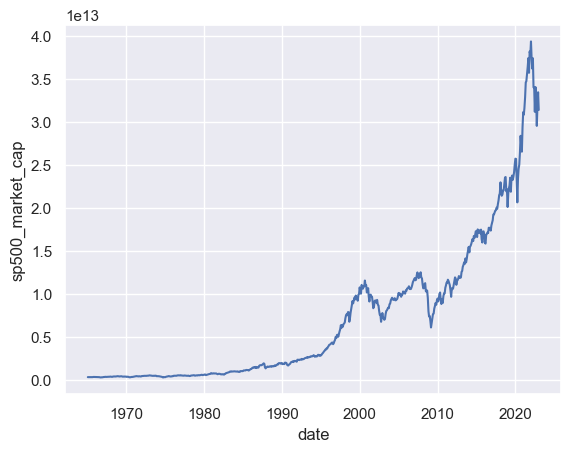

In [17]:
sns.lineplot(data=sp500_total_market_cap, x="date", y="sp500_market_cap")

In [18]:
sp500_total_market_cap_and_returns = (
    calc_SP500_index.append_actual_sp500_index_and_approx_returns_A(
        sp500_total_market_cap, df_msix
    )
)
sp500_total_market_cap_and_returns.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 696 entries, 0 to 695
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   date                   696 non-null    datetime64[ns]
 1   spindx                 696 non-null    float64       
 2   sprtrn                 696 non-null    float64       
 3   sp500_market_cap       696 non-null    float64       
 4   n_constituents         696 non-null    int64         
 5   sp500_market_cap_norm  696 non-null    float64       
 6   ret_approx_A           695 non-null    float64       
 7   cumret_approx_A        695 non-null    float64       
 8   sp500_cumret           696 non-null    float64       
dtypes: datetime64[ns](1), float64(7), int64(1)
memory usage: 49.1 KB


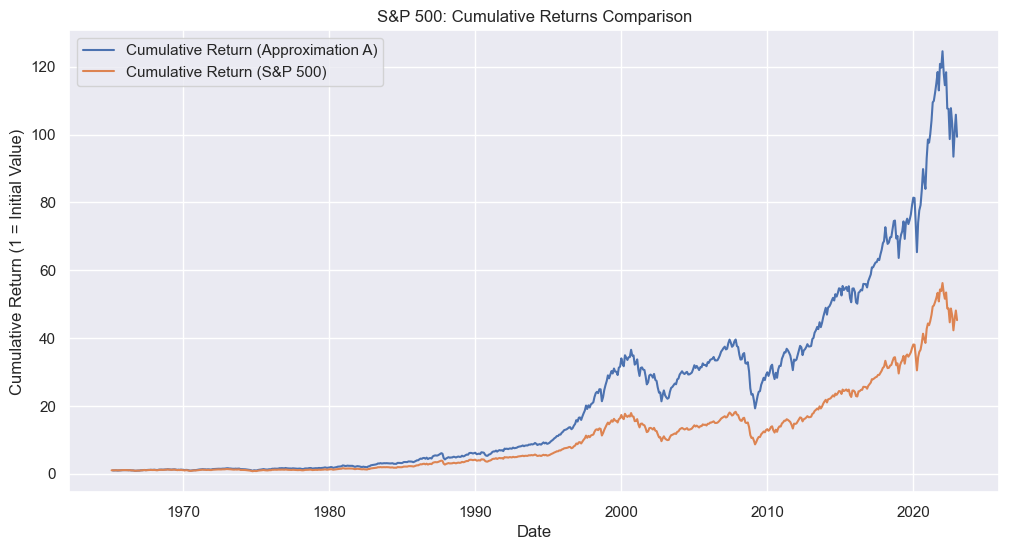

In [19]:
# Plot cumulative returns
plt.figure(figsize=(12, 6))
sns.lineplot(
    data=sp500_total_market_cap_and_returns,
    x="date",
    y="cumret_approx_A",
    label="Cumulative Return (Approximation A)",
)
sns.lineplot(
    data=sp500_total_market_cap_and_returns,
    x="date",
    y="sp500_cumret",
    label="Cumulative Return (S&P 500)",
)

plt.title("S&P 500: Cumulative Returns Comparison")
plt.xlabel("Date")
plt.ylabel("Cumulative Return (1 = Initial Value)")
plt.grid(True)
plt.legend()
plt.show()

In [20]:
# Print correlation of returns
correlation = sp500_total_market_cap_and_returns["ret_approx_A"].corr(
    sp500_total_market_cap_and_returns["sprtrn"]
)
print(f"Correlation between returns: {correlation:.4f}")


Correlation between returns: 0.9921


Notice that the difference in the cumulative returns is quite large by the end of the sample. However, the correlation between the returns is quite high (over 0.99). This 
just shows the consequences of compounding small differences over a long period of time.

Part of the reason why these series are so different is that the approximation method does not account for quarterly rebalancing.


There are two reasons why this method fails:

1. It does not account for quarterly rebalancing. It does rebalance, but it in-effect rebalances _too frequently_. Since this is just summing the market caps of the index's constituents, it is in-effect rebalancing every day. However, this rebalancing is not handled correctly, which leads to the second problem.
2. It does not represent a tradable portfolio strategy. When a stock is removed from the index and a new stock is added, this represents selling a stock that has since dropped in value and buying a new stock that has since increased in value. The returns of the index should represent the fact that a self-financing portfolio strategy is used, and this method does not represent this. That is, this strategy is not representing the profits and losses (P&L) of the index properly. 

The next method will address both of these issues.


---

### Method B: Portfolio Rebalancing

This method assumes that a trader forms a porfolio holding the index's constituents and rebalances the portfolio quarterly. Let's assume that the total amount of money in the portfolio at the beginning of the period is 1 (e.g. \$1 million). Then, assume that at each rebalancing date (in this case, quarterly), the trader buys and sells stocks such that the portfolio weights are equal to the weights of the index's constituents with respect to the ratio of the market cap of each stock to the total market cap of the index.


1. **Weight Calculation**: For each stock $i$, calculate its weight in the index:
   
   $$w_{i, t} = \begin{cases} \frac{\text{MarketCap}_{i, t}}{\text{MarketCapSP500}_{t}} & \text{if } i \in \mathcal{I}_{S\&P, t} \\ 0 & \text{otherwise} \end{cases}$$

2. **Portfolio Rebalancing**: Implement quarterly rebalancing. The portfolio weights $w^p_{i, t}$ are given by
   
   $ w^p_{i, t} = \begin{cases} w_{i, t} & \text{if } t \text{ is a rebalancing date}, \\ w^p_{i, t-1} & \text{otherwise},\end{cases} $
   
   for all $i$ and $t$.

3. **Return Approximation**: Calculate the portfolio return as:
   
   $$ R_{B, t+1} = \sum_{i} w^p_{i, t} \times R_{i, t+1}, $$
   
   where $R_{i, t+1}$ is the return of stock $i$ between $t$ and $t+1$.

4. **Index Level Approximation**: Use the approximated returns to calculate the index level, normalized to match the official S&P 500 at the start date.



**IMPORTANT**: To make this method work as accurately as possible, use the `retx` variable for $R_{i, t+1}$. This is because the `ret` variable includes dividends, which are not part of the S&P 500 index.

In [21]:
sp500_returns_B = calc_SP500_index.calculate_sp500_returns_with_rebalancing(
    df_constituents, df_msf, start_date=START_DATE, end_date=END_DATE
)
df_msix["date"] = pd.to_datetime(df_msix["caldt"])
sp500_returns_B = pd.merge(
    df_msix[["date", "spindx", "sprtrn"]],
    sp500_returns_B,
    on="date",
    how="inner",
)


,date,spindx,sprtrn,ret_approx_B,diff
count,696,696.000000,696.000000,696.000000,696.000000
mean,1994-01-13 21:55:51.724137984,915.805086,0.006457,0.006465,0.000008
min,1965-01-29 00:00:00,63.540000,-0.217630,-0.217352,-0.009691
25%,1979-07-23 00:00:00,109.477500,-0.018313,-0.018589,-0.000924
50%,1994-01-15 12:00:00,457.380000,0.009219,0.009779,-0.000043
75%,2008-07-07 18:00:00,1320.312500,0.035196,0.034665,0.000922
max,2022-12-30 00:00:00,4766.180000,0.163047,0.163577,0.014773
std,NaN,1014.371904,0.043708,0.043708,0.001965


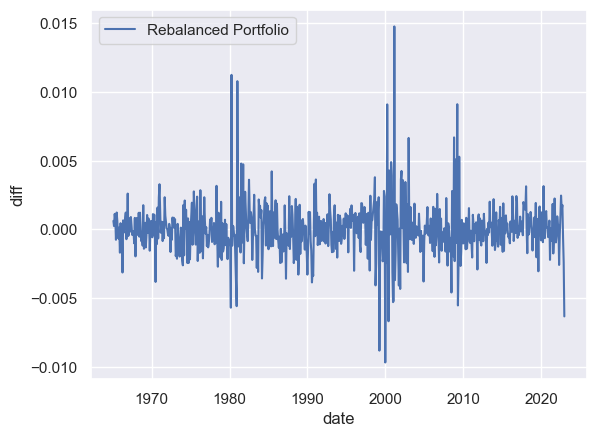

In [22]:
sp500_returns_B["diff"] = sp500_returns_B["ret_approx_B"] - sp500_returns_B["sprtrn"]
sns.lineplot(data=sp500_returns_B, x="date", y="diff", label="Rebalanced Portfolio")
sp500_returns_B.describe()

In [23]:
# Print correlation
correlation = sp500_returns_B["ret_approx_B"].corr(sp500_returns_B["sprtrn"])
print(f"Correlation between reconstructed and actual returns: {correlation:.4f}")


Correlation between reconstructed and actual returns: 0.9990


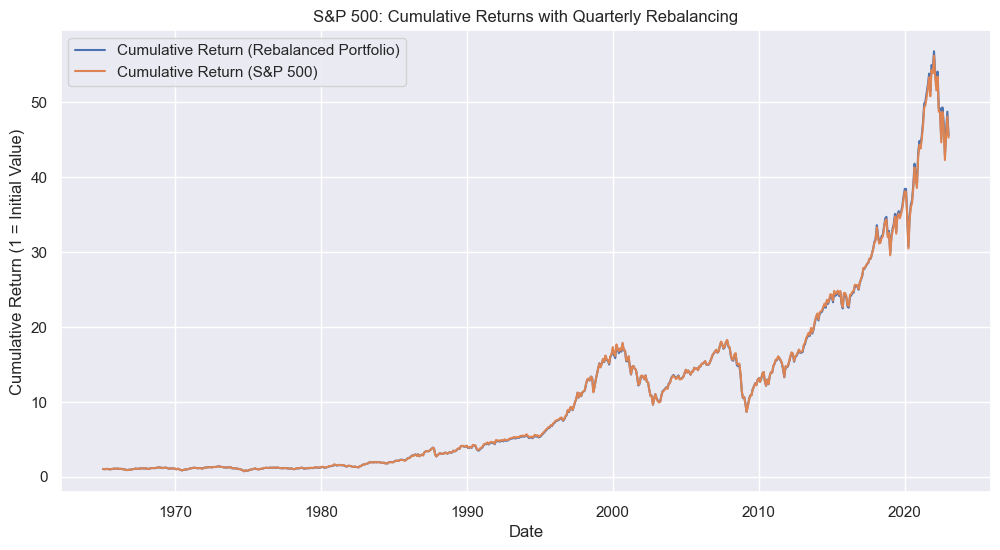

In [24]:
# Calculate cumulative returns
sp500_returns_B["cumret_approx_B"] = (1 + sp500_returns_B["ret_approx_B"]).cumprod()
sp500_returns_B["cumret_actual"] = (1 + sp500_returns_B["sprtrn"]).cumprod()

# Plot cumulative returns
plt.figure(figsize=(12, 6))
sns.lineplot(
    data=sp500_returns_B,
    x="date",
    y="cumret_approx_B",
    label="Cumulative Return (Rebalanced Portfolio)",
)
sns.lineplot(
    data=sp500_returns_B,
    x="date",
    y="cumret_actual",
    label="Cumulative Return (S&P 500)",
)
plt.title("S&P 500: Cumulative Returns with Quarterly Rebalancing")
plt.xlabel("Date")
plt.ylabel("Cumulative Return (1 = Initial Value)")
plt.grid(True)
plt.legend()
plt.show()


Above we can now see that the cumulative returns are very similar. The correlation between the returns is even higher (over 0.998).

---

### Comparing the Approximations

Once both methods are implemented, compare the reconstructed index to the actual S\&P 500 by:

1. **Correlation of Returns**: Measure the correlation between the approximated returns and the official S\&P 500 returns.
2. **Index Level Alignment**: Plot the approximated index levels against the official levels to assess how well each method tracks the S\&P 500 over time.
3. **Impact of Rebalancing**: Analyze how quarterly rebalancing affects the accuracy of the reconstruction.

In [25]:
## Function that merges all results together
df = calc_SP500_index.create_sp500_index_approximations(data_dir=DATA_DIR)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 696 entries, 0 to 695
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   date                   696 non-null    datetime64[ns]
 1   spindx                 696 non-null    float64       
 2   sprtrn                 696 non-null    float64       
 3   sp500_market_cap       696 non-null    float64       
 4   n_constituents         696 non-null    int64         
 5   sp500_market_cap_norm  696 non-null    float64       
 6   ret_approx_A           695 non-null    float64       
 7   cumret_approx_A        695 non-null    float64       
 8   sp500_cumret           696 non-null    float64       
 9   ret_approx_B           695 non-null    float64       
dtypes: datetime64[ns](1), float64(8), int64(1)
memory usage: 54.5 KB


In [26]:
df[["sprtrn", "ret_approx_A", "ret_approx_B"]].corr()


,sprtrn,ret_approx_A,ret_approx_B
sprtrn,1.000000,0.992116,0.998989
ret_approx_A,0.992116,1.000000,0.991552
ret_approx_B,0.998989,0.991552,1.000000


Above we saw that the rebalanced portfolio method is more accurate than the simple sum of market caps method. The cumulative returns are much more similar and the correlation between the returns is higher.